In [63]:
import numpy as np 
from matplotlib import pyplot as plt 
%matplotlib inline 

In [64]:
plt.style.use('dark_background')

In [144]:
L=1.0
nx=51
dx=L/(nx-1)
a=1.22e-3
x=np.linspace(0.0, L, num=nx)
T0=np.zeros(nx)
T0[0]=100.0
CFL=np.array([5.0])
dt=CFL*dx**2/a
q=0.0
nt=100
cases=len(CFL)

In [145]:
CFL

array([5.])

(-0.5, 110.0)

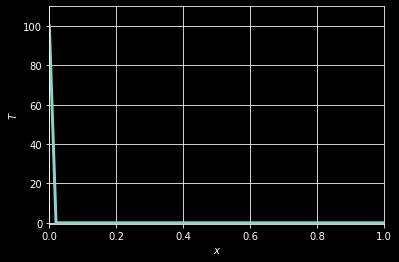

In [146]:
plt.figure(figsize=(6.0, 4.0))
plt.xlabel(r'$x$')
plt.ylabel(r'$T$')
plt.grid()
plt.plot(x, T0, color='C0', linestyle='-', linewidth=3)
plt.xlim(0.0, L)
plt.ylim(-0.5, 110.0)

In [147]:
from scipy import linalg

In [148]:
def lhs_operator(N, CFL0):
    D = np.diag((2.0 + 1.0 / CFL0) * np.ones(N))
    D[-1, -1] = 1.0 + 1.0 / CFL0
    U = np.diag(-1.0 * np.ones(N - 1), k=1)
    L = np.diag(-1.0 * np.ones(N - 1), k=-1)
    A = D + U + L
    return A

In [149]:
def rhs_vector(T, CFL0, q, dx):
    b = T[1:-1] / CFL0
    b[0] += T[0]
    b[-1] += q*dx
    return b

In [150]:
def btcs_implicit(T, CFL0, nt, dx, a, q):
    for n in range (nt-1):
        A = lhs_operator(nx-2, CFL0)
        b = rhs_vector(T[n], CFL0, q, dx)
        T[n+1, 0]=T0[0]
        T[n+1, 1:-1]=linalg.solve(A, b)
        T[n+1, -1]=T[n+1, -2]+q*dx
    return T

In [151]:
def ftcs(T, CFL0):
    for n in range (nt-1):
        T[n+1, 0]=T0[0]
        T[n+1, 1:-1]=T[n, 1:-1] + CFL0*(T[n, 2:]-2*T[n, 1:-1]+T[n, :-2])
        T[n+1,-1]=T[n+1, -2]
    return T

In [152]:
T_values=[]
for CFL0 in CFL:
    T=np.empty((nt, nx))
    T[0]=T0
    T=btcs_implicit(T, CFL0, nt, dx, a, q)
    T_values.append(T)

(-0.5, 110.0)

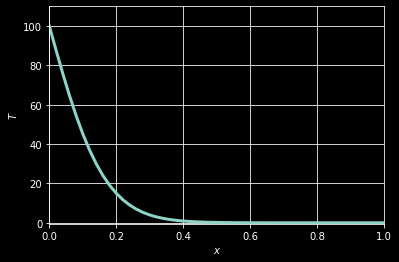

In [153]:
plt.figure(figsize=(6.0, 4.0))
plt.xlabel(r'$x$')
plt.ylabel(r'$T$')
plt.grid()
plt.plot(x, T_values[0][5], color='C0', linestyle='-', linewidth=3)
plt.xlim(0.0, L)
plt.ylim(-0.5, 110.0)

In [154]:
stackT_values=T_values[0]
for n in range(cases-1):
    stackT_values=np.vstack((stackT_values, T_values[n+1]))

In [155]:
from matplotlib import animation
from IPython.display import HTML

(-0.5, 100.0)

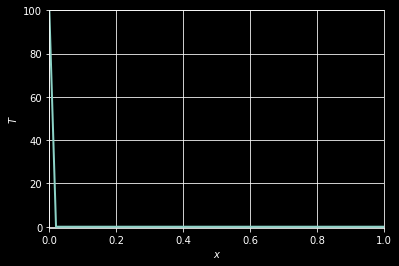

In [156]:
fig = plt.figure(figsize=(6.0, 4.0))
plt.xlabel(r'$x$')
plt.ylabel(r'$T$')
plt.grid()
line = plt.plot(x, T_values[0][0,:],
                    color='C0', linestyle='-', linewidth=2)[0]
plt.xlim(0.0, L)
plt.ylim(-0.5, 100.0)

In [157]:
def update_plot(n, stackT_values):
    fig.suptitle('Time step {:0>2}'.format(n))
    line.set_ydata(stackT_values[n,:])

In [158]:
anim = animation.FuncAnimation(fig, update_plot,
                               frames=nt*cases, fargs=(stackT_values,),
                               interval=100)
# Display the video.
HTML(anim.to_html5_video())